In [6]:
import numpy as np
import pandas as pd
from scipy.linalg import svd

filename = 'heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(filename)
raw_data = df.values
# Delete categorical features
df = df.drop(["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT" ], 1)
data = df.values
cols = range(0, 7)

# Matrix with data without col names
X = data[:, cols]

# We hold the attribute names in an arrray
attribute_names = np.asarray(df.columns[cols])
attribute_dic = dict(zip(attribute_names, range(len(attribute_names))))

# Our class labels is DEATH (in this case 1 if dead 0 if survived)
classLabels = raw_data[:, -1]
classNames = sorted(set(classLabels))
classDic = dict(zip(classNames, range(len(classNames))))
y = np.array([classDic[i] for i in classLabels])

# We hold the shape of X matrix nxm
N, M = X.shape
C = len(classNames)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y = X - np.ones((N, 1))*X.mean(0) 
Y = Y*(1/np.std(Y,0))

# Perform Principal Componet Analysis
U,S,V = svd(Y, full_matrices= False)
V = V.T
Z = Y @ V





/tmp/ipykernel_1042/3605415941.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking", "DEATH_EVENT" ], 1)


# **PLOT VARIANCE EXPLAINED FOR EACH PC**

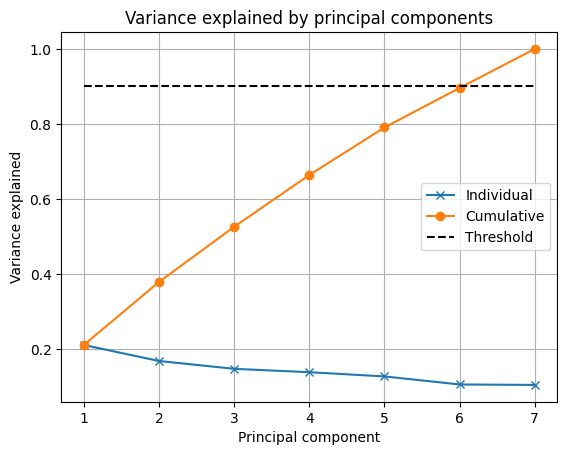

In [7]:
import matplotlib.pyplot as plt
# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 
threshold = 0.9



plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

# **PLOT PCs**

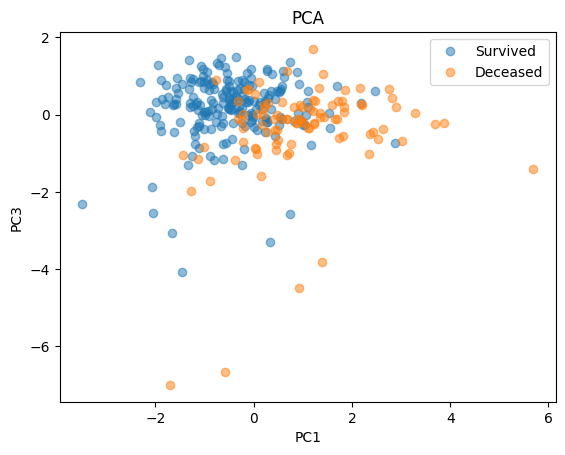

In [15]:
# Select pricipal components to plot [0,6] total of 7
i = 0 # 0 == PC1
j = 1 # 1 == PC2

# Plot PCA of the data
f = plt.figure()
plt.title('PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legends = ["Survived", "Deceased"]
plt.legend(legends)
plt.xlabel('PC{0}'.format(i+1))
plt.ylabel('PC{0}'.format(j+1))

# Output result to screen
plt.show()

# **PLOT LINEAR COMBINATION OF PCs**

dict_items([('age', 0), ('creatinine_phosphokinase', 1), ('ejection_fraction', 2), ('platelets', 3), ('serum_creatinine', 4), ('serum_sodium', 5), ('time', 6)])


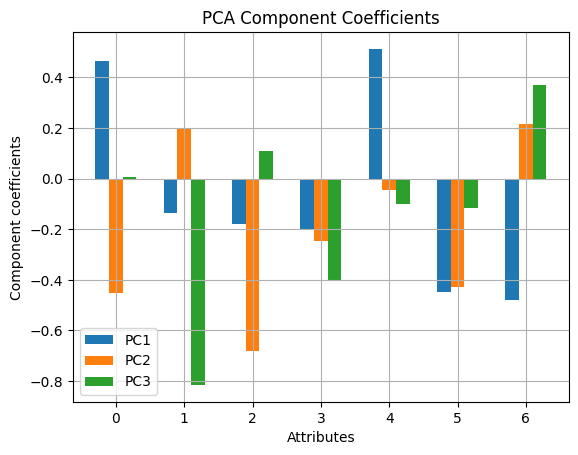

In [9]:
pcs = [0,1,2]
legendStrs = ['PC'+str(e+1) for e in pcs]
c = ['r','g','b']
bw = .2
r = np.arange(1,M+1)
print(attribute_dic.items())
for i in pcs:    
    plt.bar(r+i*bw, V[:,i], width=bw)
plt.xticks(r+bw, attribute_dic.values())
plt.xlabel('Attributes')
plt.ylabel('Component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('PCA Component Coefficients')
plt.show()

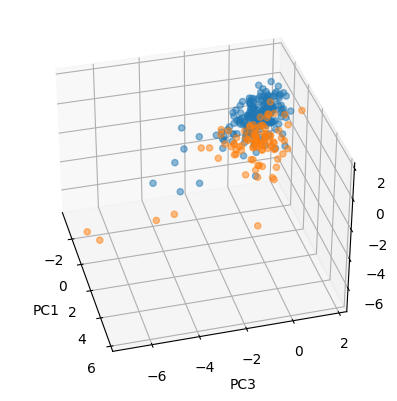

In [14]:
from mpl_toolkits import mplot3d
i = 0 # 0 == PC1
j = 2 # 1 == PC2
k = 2

fig = plt.figure()
ax = plt.axes(projection='3d')

for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    ax.scatter3D(Z[class_mask,i], Z[class_mask,j], Z[class_mask,k], 'o', alpha=.5)
plt.xlabel('PC{0}'.format(i+1))
plt.ylabel('PC{0}'.format(j+1))
ax.view_init(35, -15)
